# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/Amazon Sales data (1).xlsx"
df = pd.read_excel(path)

# **Data Cleaning**

In [ ]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87


Now, we observe each feature of the dataset:

1. `Region:` It describes the geographic location where sales occured.
2. `Country:` It describes the country of that geographic location.
3. `Item type:` This shows the variety of item category.
4. `Sales Channel`: It indicates the medium or platform through which sales transactions are conducted.
5. `Order priority:` It indicates the urgency level assigned to fulfilling an order, such as high, medium, low, or critical.
6. `Order Date:` It shows the date on which order was placed.
7. `Order Id:` It is a unique identifier assigned to each sales transaction, ensuring each order can be distinctly tracked and referenced.
8. `Ship date:` It indicates the date on which order was shipped to the customer.
9. `Units Sold:` It signifies the quantity of items sold per transaction.
10. `Unit Price:` It Indicates the price of each item in the specified item type per unit
11. `Unit Cost:` The amount it costs Amazon to get or make each item.
12. `Total Revenue:` The total amount of money earned from sales before any expenses are deducted.
13. `Total Cost:` The overall expense incurred by Amazon, encompassing all costs associated with acquiring, producing, and delivering products sold, including operational expenses.
14. `Total Profit:` The amount earned from selling an item after subtracting all expenses associated with acquiring, producing, and delivering it.















In [ ]:
df.shape

(100, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

`Observation:` There is no null values present in the dataset.



In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100.00,100,100.00,100.00,100.00,100.00,100.00,100.00
mean,2013-09-16 14:09:36,555020412.36,2013-10-09 22:48:00,5128.71,276.76,191.05,1373487.68,931805.70,441681.98
min,2010-02-02 00:00:00,114606559.00,2010-02-25 00:00:00,124.00,9.33,6.92,4870.26,3612.24,1258.02
25%,2012-02-14 12:00:00,338922488.00,2012-02-24 18:00:00,2836.25,81.73,35.84,268721.21,168868.03,121443.58
50%,2013-07-12 12:00:00,557708561.00,2013-08-11 12:00:00,5382.50,179.88,107.28,752314.36,363566.39,290767.99
75%,2015-04-07 00:00:00,790755080.75,2015-04-28 00:00:00,7369.00,437.20,263.33,2212044.68,1613869.72,635828.80
max,2017-05-22 00:00:00,994022214.00,2017-06-17 00:00:00,9925.00,668.27,524.96,5997054.98,4509793.96,1719922.04
std,NaN,260615257.13,NaN,2794.48,235.59,188.21,1460028.71,1083938.25,438537.91


In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.shape

(100, 14)

`Observation:` No duplicate values present in the given dataset.

In [ ]:
#convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
#Extract Year and month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
#adding total Sales column
df['Total Sales'] = df['Units Sold']*df['Unit Price']

In [ ]:
df.shape

(100, 17)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,3296425.02


In [ ]:
#calculate the number of region
region = df['Region'].nunique()

print(f"Total number of region: {region}")

Total number of region: 7


There are 7 regions in our dataset

In [ ]:
df['date'] = pd.to_datetime(df['Order Date'])

# Extract the year
df['year'] = df['Order Date'].dt.year
df['Year'].unique()

array([2010, 2012, 2014, 2013, 2015, 2011, 2017, 2016], dtype=int32)

In [ ]:
#calculate the total number of country
country_num = df['Country'].nunique()

print(f'Total number of country: {country_num} ')

Total number of country: 76 


Amazon sales spread in total 76 countries as per given dataset

In [ ]:
#calculate total Item Type
item_num = df['Item Type'].nunique()

print(f"Total Item type: {item_num}")

Total Item type: 12


Total 12 types of item present in our dataset

In [ ]:
#calculating total units sold
total_units_sold = df['Units Sold'].sum()

print(f"Total units sold: {total_units_sold}")

Total units sold: 512871


In [ ]:
#calculating total units cost
total_unit_cost = df['Unit Cost'].sum()

print(f"Total unit costs: {total_unit_cost}")

Total unit costs: 19104.8


In [ ]:
#calculating total revenue
total_revenue = df['Total Revenue'].sum()

print(f"Total Revenue generated: {total_revenue}")

Total Revenue generated: 137348768.31


In [ ]:
#calculating total costs
total_costs = df['Total Cost'].sum()

print(f"Total costs: {total_costs}")

Total costs: 93180569.91000001


In [ ]:
#calculating total profit
total_profit = df['Total Profit'].sum()

print(f"Total Profit: {total_profit}")

Total Profit: 44168198.39999999


In [ ]:
#Identifying region wise profit made
region_wise_profit = df.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().reset_index()

region_wise_profit

,Region,Sales Channel,Total Profit
0,Asia,Offline,3584286.33
1,Asia,Online,2529559.54
2,Australia and Oceania,Offline,1886283.82
3,Australia and Oceania,Online,2835876.21
4,Central America and the Caribbean,Offline,2475814.99
5,Central America and the Caribbean,Online,371092.86
6,Europe,Offline,5574539.91
7,Europe,Online,5508398.72
8,Middle East and North Africa,Offline,2169081.08
9,Middle East and North Africa,Online,3592110.78


`Observation:` Asia, Central America and the Caribbean, Europe, Sub-Saharan Africa has generated more profit in offline mode whereas Australia and Oceania, Middle East and North Africa had more profit in online mode. North America has only offline option.


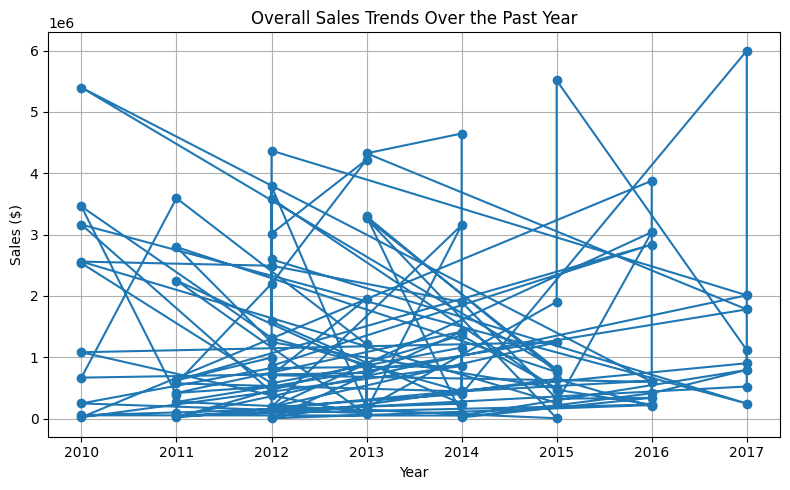

In [ ]:
#sales Trend over past years
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Total Sales'], marker='o', linestyle='-')
plt.title('Overall Sales Trends Over the Past Year')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

`Observation:` Over past 7 years from 2010 to 2017, Total sales had showed the positive trend. It is important to note that this graph only shows data for eight years, so it is difficult to say for sure whether this upward trend will continue.

In [ ]:
# Which item Types are top sellers, and which are underperforming?
item_type = df.groupby(df['Item Type'])['Total Sales'].sum().reset_index()

item_type

,Item Type,Total Sales
0,Baby Food,10350327.60
1,Beverages,2690794.60
2,Cereal,5322898.90
3,Clothes,7787292.80
4,Cosmetics,36601509.60
5,Fruits,466481.34
6,Household,29889712.29
7,Meat,4503675.75
8,Office Supplies,30585380.07
9,Personal Care,3980904.84


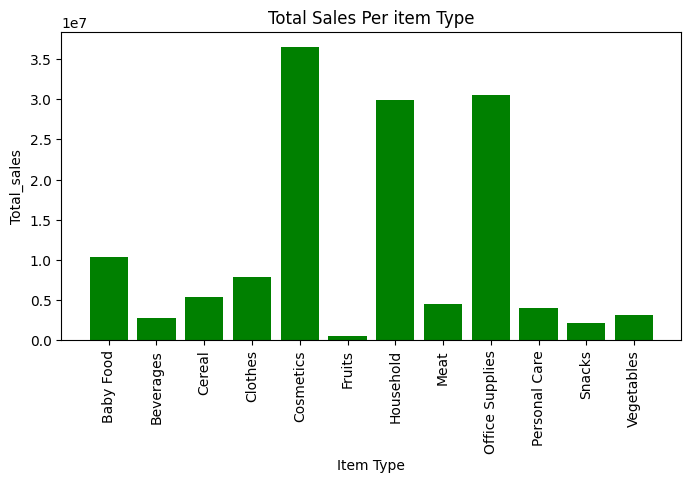

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(item_type['Item Type'], item_type['Total Sales'], color='g')
plt.title('Total Sales Per item Type')
plt.xlabel('Item Type')
plt.ylabel('Total_sales')
plt.xticks(rotation=90)
plt.show()

`Observation:` Cosmetics are the top seller item type as per data whereas Fruits are underperforming.

In [ ]:
#Identifyng top 10 customers

# Sort the DataFrame by 'Total Sales' in descending order
sorted_df = df.sort_values(by='Total Sales', ascending=False)

# Group by 'Order ID' and sum the 'Total Sales' for each customer
top_customers = df.groupby('Order ID')['Total Sales'].sum().reset_index()

#  Merge with the original DataFrame to get the region and country information
top_10_customers = pd.merge(top_customers, df[['Order ID', 'Region', 'Country']].drop_duplicates(), on='Order ID', how='left').reset_index()

# Display the top 10 customers with their corresponding region and countr
top_10_customers = top_10_customers.sort_values(by='Total Sales', ascending=False)

top_10_customers.head(10)

,index,Order ID,Total Sales,Region,Country
47,47,522840487,5997054.98,Central America and the Caribbean,Honduras
9,9,177713572,5513227.50,Asia,Myanmar
7,7,166460740,5396577.27,Europe,Lithuania
98,98,986435210,4647149.58,North America,Mexico
22,22,320009267,4368316.68,Asia,Brunei
17,17,231145322,4324782.40,Middle East and North Africa,Pakistan
62,62,670854651,4220728.80,Australia and Oceania,Samoa
24,24,331438481,3876652.40,Europe,Iceland
19,19,249693334,3786589.20,Europe,Switzerland
8,8,177636754,3593376.78,Sub-Saharan Africa,Cameroon


These are the top 10 customers in given dataset

In [ ]:
#Distribution of customers in different regions
df.groupby(df['Region'])['Order ID'].count().reset_index()

,Region,Order ID
0,Asia,11
1,Australia and Oceania,11
2,Central America and the Caribbean,7
3,Europe,22
4,Middle East and North Africa,10
5,North America,3
6,Sub-Saharan Africa,36


`Observation:`   'Sub-Saharan Africa' and 'Europe' has the highest number of customers i.e. 36 & 22, and 'North America' as least number of customer i.e. 3

In [ ]:
#Top 5 countries having maximum customers

df1 = df.groupby(df['Country'])['Order ID'].count().reset_index()

max_customers = df1.sort_values(by='Order ID', ascending=False)

max_customers.head(5)

,Country,Order ID
71,The Gambia,4
41,Mexico,3
2,Australia,3
59,Sao Tome and Principe,3
62,Sierra Leone,3


`Observation:` The Gambia, Maxico, Australia, SaoTome and Principe, Sierra Leone are the top 5 countries having maximum customers as per given dataset.

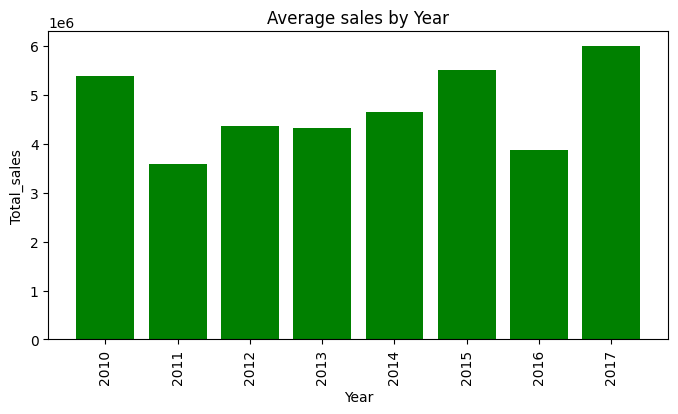

In [ ]:
#Year wise sales
year_sales = df.groupby(['Year'])['Total Revenue'].mean()
plt.figure(figsize=(8,4))
plt.bar(df['Year'], df['Total Sales'], color='g')
plt.title('Average sales by Year')
plt.xlabel('Year')
plt.ylabel('Total_sales')
plt.xticks(rotation=90)
plt.show()

`Observation:` The graph shows the positive trend from last eight years

In [ ]:
#adding new column as delivery days
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Total Sales,Delivery_Days
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2533654.00,30
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,576782.80,24
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,1158502.59,6
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,75591.66,15
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,3296425.02,5


In [ ]:
#Region having maximum days delivery
df.groupby(['Region'])['Delivery_Days'].max().reset_index()

,Region,Delivery_Days
0,Asia,47
1,Australia and Oceania,42
2,Central America and the Caribbean,44
3,Europe,45
4,Middle East and North Africa,47
5,North America,36
6,Sub-Saharan Africa,50


In [ ]:
#minimum days to delivery the item type
df.groupby(['Item Type'])['Delivery_Days'].min().reset_index()

,Item Type,Delivery_Days
0,Baby Food,4
1,Beverages,4
2,Cereal,1
3,Clothes,4
4,Cosmetics,0
5,Fruits,3
6,Household,4
7,Meat,9
8,Office Supplies,2
9,Personal Care,1


In [ ]:
#Region wise minimum days taken to delivery
df.groupby(df['Region'])['Delivery_Days'].min().reset_index()

,Region,Delivery_Days
0,Asia,4
1,Australia and Oceania,4
2,Central America and the Caribbean,5
3,Europe,0
4,Middle East and North Africa,3
5,North America,9
6,Sub-Saharan Africa,0
